# Deep Learning
# DL07 Clasificación de un Sonar



## <font color='blue'>**Clasificación binaria de un Sonar**</font>
<p style='text-align: justify;'>

El conjunto de datos que usaremos en esta clase práctica es la base de datos de un sonar. La base de datos describe los retornos del sonar rebotando en diferentes superficies. Las 60 variables de entrada son la fuerza de los rebotes con diferentes ángulos. Es un problema de clasificación binaria que requiere un modelo para diferenciar si el material que sensa el sonar son rocas o metal.

De la base de datos se observa que todas las variables son continuas y generalmente están en el rango de 0 a 1. La variable de salida es un string "M" para metal y "R" para roca, que deberá convertirse (codificarse) en números enteros 1 y 0. El conjunto de datos contiene 208 observaciones. 

La idea de usar esta base de datos, es que es un problema conocido y que ha sido estudiado. Esto significa que tenemos una idea de la habilidad esperada del modelo. Mediante la validación cruzada, una red neuronal debería poder alcanzar un rendimiento de aproximadamente el 84% con un límite superior en la precisión para modelos personalizados en aproximadamente el 88%.

### Clasificación binaria del Sonar

Comenzaremos importando todas las clases y funciones que necesitaremos. Además, podemos inicializar el generador de números aleatorios seed para asegurarnos de que siempre obtengamos los mismos resultados al ejecutar este código. Esto ayudará si estamos depurando.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# seed
seed = 7
numpy.random.seed(seed)

Ahora podemos cargar la base de datos utilizando Pandas y separar en columnas en 60 variables de entrada (X) y 1 variable de salida (Y). Utilizamos la librería Pandas para cargar los datos porque maneja caracteres (la variable de salida), mientras que intentar cargar los datos directamente usando, por ejemplo, NumPy sería más difícil.

La variable de salida es una letra (caracter, "M" o "R"), debemos convertirla a valores enteros 0 y 1. Podemos hacer esto usando la clase LabelEncoder() de Scikit-Learn. Como habíamos visto en las prácticas anteriores, esta función realiza la codificación mediante la función encoder.fit() y luego aplica la nueva codificación en la variable de salida usando encoder.transform().  

In [3]:
## base de datos
# path = '/content/drive/MyDrive/Cursos/TalentoDigital/Modulo 7- Redes Neuronales/Final/MLP/Clase3/'
path = '/content/drive/MyDrive/07_DeepLearning/files/'
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entrada y salidas 
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y   #codificada con indices enteros 0, 1
print("Codificando la salida:")
print(dummy_y)
print("Forma de los datos de entrada:")
print("ejemplos, atributos")
print(X.shape)
print("Forma de las etiquetas:")
print(Y.shape)

Codificando la salida:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Forma de los datos de entrada:
ejemplos, atributos
(208, 60)
Forma de las etiquetas:
(208,)


In [5]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R



Vamos a crear nuestro modelo y usaremos Scikit-Learn para evaluar el modelo utilizando la validación cruzada de k-fold. Para usar los modelos Keras con Scikit-Learn, debemos usar el contenedor KerasClassifier, de la misma forma que en la práctica anterior. 

La clase KerasClassifier toma una función que crea y devuelve nuestro modelo de red neuronal. Se deben ingresar los argumentos para pasar a la función de ajuste fit(), como el número de épocas y el tamaño del lote. Vamos a empezar definiendo la función que crea nuestro modelo, llamada sonar_model(). Nuestro modelo tendrá una única capa oculta totalmente conectada con el mismo número de neuronas que las variables de entrada. Luego podemos crear otras redes neuronales para analizar el problema. 

Los pesos se inicializan utilizando un pequeño número aleatorio gaussiano ("normal"). Se utiliza la función de activación de rectificación (ReLU). La capa de salida contiene una sola neurona para hacer predicciones (**clasificación binaria**). Se utiliza la función de activación sigmoide para producir una salida de probabilidad en el rango de 0 a 1 que se puede convertir fácil y automáticamente a valores de clase nítidos. Además, se usa la función de pérdida logarítmica (**binary crossentropy**) durante el entrenamiento, que es la función de pérdida preferida para los problemas de clasificación binaria. El modelo también utiliza como optimizador el algoritmo Adam para el descenso del gradiente y las métricas de accuracy se recopilarán cuando se entrene el modelo.

In [6]:
# definir funcion para el modelo de red neuronal
def sonar_model():
    # modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60,  activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Ahora es el momento de evaluar este modelo utilizando una validación cruzada con Scikit-Learn. Le pasamos el número de épocas de entrenamiento y el batch_size al KerasClassifier. Se utiliza un k-fold de 10 veces para la validación cruzada.

In [7]:
# evaluar el modelo con k-fold

estimator = KerasClassifier(build_fn=sonar_model, epochs=100, batch_size=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5615
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6952
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.7326
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7540
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7807
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7807
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7540
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8075
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8289
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8235
Epoch 11/

### Código completo para revisión

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# función para crear el modelo
def sonar():
    # modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=sonar, epochs=100, batch_size=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold, n_jobs=-1)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 82.71% (9.98%)


### Mejorar el rendimiento con el procesamiento de los datos

Es una buena práctica procesarr sus datos antes de generar el modelo de red. Un esquema de procesamiento de datos para construir modelos de redes neuronales es la estandarización (normalización). Aquí es donde los datos se reajustan de manera tal que el valor medio para cada atributo es 0 y la desviación estándar es 1. 

Podemos usar Scikit-Learn para realizar la estandarización de nuestr base de datos de Sonar utilizando la clase StandardScaler. En lugar de realizar la estandarización en todo el conjunto de datos, se realiza solo a los datos de entrenamiento durante la ejecución del la validación cruzada k fold. Así evalua el modelo con datos no vistos. Podemos lograr esto en Scikit-Learn usando una clase Pipeline. Pipeline ejecuta uno o más modelos dentro de un paso del procedimiento de validación cruzada. Aquí, podemos definir un pipeline con el StandardScaler seguido por nuestro modelo de red neuronal.

### Sintonización de neuronas y capas en el modelo

Hay muchas cosas que sintonizar en una red neuronal, como la inicialización del peso, las funciones de activación, el procedimiento de optimización, etc. Un aspecto que puede tener un efecto de gran tamaño es la estructura de la red en sí misma, llamada topología de la red. Revisemos dos experimentos sobre la estructura de la red: hacerla más pequeña y hacerla más grande. Estos son buenos experimentos para cuando desee sintonizar una red neuronal.

### Evaluar una red más pequeña

Se sospecha que hay mucha redundancia en las variables de entrada para este problema. Los datos describen la misma señal desde diferentes ángulos. Quizás algunos de esos ángulos sean más relevantes que otros. Podemos forzar un tipo de extracción de características por parte de la red al restringir el espacio de representación en la primera capa oculta.

En este experimento tomamos nuestro modelo de referencia con 60 neuronas en la capa oculta y lo reducimos a la mitad a 30. Esto presionará a la red durante el entrenamiento para seleccionar la estructura más importante en los datos de entrada para modelar. También estandarizaremos los datos como en el experimento anterior con la preparación de datos e intentaremos aprovechar el pequeño aumento en el rendimiento.

## <font color='green'>**Actividad 1**</font> (50 Minutos)

Evaluar una red mas pequeña:

1. Normalice la data aplicando algunos de los metodos de normalización proporcionado por *sklearn.preprocessing: Preprocessing and Normalization*.

2. Proponga una red de una capa pero con menos nodos. (Por ejemplo 30).

3. Compare los resultados respecto del modelo anterior. Genere una grafica train, val v/s epochs.

In [26]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# función para crear el modelo con red más pequeña (~30 nodos)
def sonar_2():
    # modelo
    model = Sequential()
    model.add(Dense(30, input_dim=60, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Aquí, podemos definir un pipeline con el StandardScaler seguido por nuestro modelo de red neuronal.
pipeline = Pipeline([('standardize', StandardScaler()), 
                     (('mlp', KerasClassifier(build_fn=sonar_2, epochs=100, batch_size=5)))])

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results2 = cross_val_score(pipeline, X, dummy_y, cv=kfold, n_jobs=-1)
print("Accuracy red más pequeña: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Accuracy red más pequeña: 85.02% (8.56%)


In [28]:
print("Accuracy red inicial: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy red inicial: 83.19% (9.05%)


*_Conclusión:_* La red neuronal más pequeña tiene resultados más precisos (85>83%) y más consistentes (i.e., desviación estandar del accuracy más pequeño).

Text(0, 0.5, 'Accuracy')

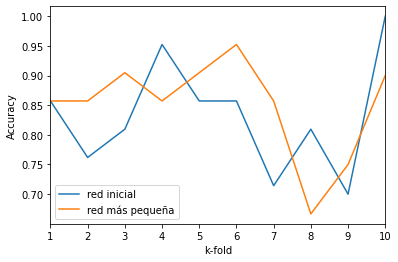

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,11), results, label='red inicial')
plt.plot(range(1,11), results2, label='red más pequeña')
plt.legend()
plt.xlabel('k-fold')
plt.xlim([1, 10])
plt.ylabel('Accuracy')


<font color='green'>**Fin Actividad 1**</font> (50 Minutos)


# Evaluar una red más grande

Una topología de red neuronal con más capas ofrece más oportunidades para que la red extraiga características claves y las combine de formas no lineales útiles. Podemos evaluar si agregar más capas a la red mejora el rendimiento haciendo otro pequeño ajuste a la función utilizada para crear nuestro modelo. Aquí, agregamos una nueva capa a la red que introduce otra capa oculta con 30 neuronas después de la primera capa oculta. Nuestra red ahora tiene la topología:

60 entradas -> [60 -> 30] -> 1 salida

La idea aquí es que a la red se le da la oportunidad de modelar todas las variables de entrada antes de ser estancada y obligada a reducir a la mitad la capacidad de representación, como lo hicimos en el experimento anterior con la red más pequeña. En lugar de exprimir la representación de las entradas en sí, tenemos una capa oculta adicional para ayudar en el proceso.

## <font color='green'>**Actividad 2**</font> (50 Minutos)

1. Normalice la data

2. Evalue una red mas grande. Agregue una capa adicional

3. Compare los resultados respecto del modelo anterior. Genere una grafica train, val v/s epochs.

In [29]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# Evalue una red mas grande. Agregue una capa adicional
def sonar_3():
    # modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Aquí, podemos definir un pipeline con el StandardScaler seguido por nuestro modelo de red neuronal.
pipeline = Pipeline([('standardize', StandardScaler()), 
                     (('mlp', KerasClassifier(build_fn=sonar_3, epochs=100, batch_size=5)))])

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results3 = cross_val_score(pipeline, X, dummy_y, cv=kfold, n_jobs=-1)
print("Accuracy red más grande: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Accuracy red más grande: 86.52% (8.24%)


In [30]:
print("Accuracy red inicial: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Accuracy red más pequeña: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))
print("Accuracy red más grande: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))

Accuracy red inicial: 83.19% (9.05%)
Accuracy red más pequeña: 85.02% (8.56%)
Accuracy red más grande: 86.52% (8.24%)


_Conclusión_: Contraintuitivamente la red más grande es menos precisa que la más pequeña.

Text(0, 0.5, 'Accuracy')

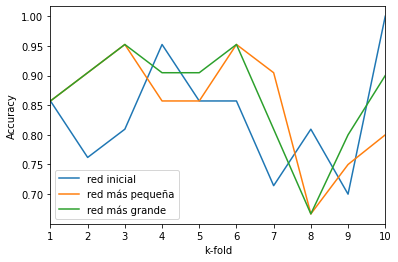

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,11), results, label='red inicial')
plt.plot(range(1,11), results2, label='red más pequeña')
plt.plot(range(1,11), results3, label='red más grande')
plt.legend()
plt.xlabel('k-fold')
plt.xlim([1, 10])
plt.ylabel('Accuracy')

###Se hace el ajuste de una forma alternativa para guardar los resultados de cada epoch

In [38]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# Evalue una red mas grande. Agregue una capa adicional
def sonar_3():
    # modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Aquí, podemos definir un pipeline con el StandardScaler seguido por nuestro modelo de red neuronal.
pipeline = Pipeline([('standardize', StandardScaler()), 
                     (('mlp', KerasClassifier(build_fn=sonar_3, epochs=100, batch_size=5)))])

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

loss3 = []
acc3 = []
val_loss3 = []
val_acc3 = []

# cross validate
# se cambia la forma para ir registrando el resultado de cada epoch
for train_index, val_index in kfold.split(X):
    model = sonar_3()
    hist = model.fit(X[train_index], dummy_y[train_index],
                     epochs=100,
                     batch_size=5,
                     validation_data = (X[val_index], dummy_y[val_index]),
                     verbose=0)
    loss3.append(hist.history['loss'])
    acc3.append(hist.history['accuracy'])
    val_loss3.append([hist.history['val_loss']])
    val_acc3.append(hist.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [59]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# función para crear el modelo con red más pequeña (~30 nodos)
def sonar_2():
    # modelo
    model = Sequential()
    model.add(Dense(30, input_dim=60, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Aquí, podemos definir un pipeline con el StandardScaler seguido por nuestro modelo de red neuronal.
pipeline = Pipeline([('standardize', StandardScaler()), 
                     (('mlp', KerasClassifier(build_fn=sonar_2, epochs=100, batch_size=5)))])

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

loss2 = []
acc2 = []
val_loss2 = []
val_acc2 = []

# cross validate
# se cambia la forma para ir registrando el resultado de cada epoch
for train_index, val_index in kfold.split(X):
    model = sonar_2()
    hist = model.fit(X[train_index], dummy_y[train_index],
                     epochs=100,
                     batch_size=5,
                     validation_data = (X[val_index], dummy_y[val_index]),
                     verbose=0)
    loss2.append(hist.history['loss'])
    acc2.append(hist.history['accuracy'])
    val_loss2.append([hist.history['val_loss']])
    val_acc2.append(hist.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [60]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# seed
seed = 7
numpy.random.seed(seed)

## base de datos
dataframe = pandas.read_csv(path + "sonar.csv", header=None)
dataset = dataframe.values
# entradas y salidas
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# codificación
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = encoded_Y
# print(dummy_y)

# función para crear el modelo
def sonar():
    # modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    # compilar
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=sonar, epochs=100, batch_size=5)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

loss = []
acc  = []
val_loss = []
val_acc  = []

# cross validate
# se cambia la forma para ir registrando el resultado de cada epoch
for train_index, val_index in kfold.split(X):
    model = sonar()
    hist = model.fit(X[train_index], dummy_y[train_index],
                     epochs=100,
                     batch_size=5,
                     validation_data = (X[val_index], dummy_y[val_index]),
                     verbose=0)
    loss.append(hist.history['loss'])
    acc.append(hist.history['accuracy'])
    val_loss.append([hist.history['val_loss']])
    val_acc.append(hist.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Text(0.5, 0.98, 'kfold # 1')

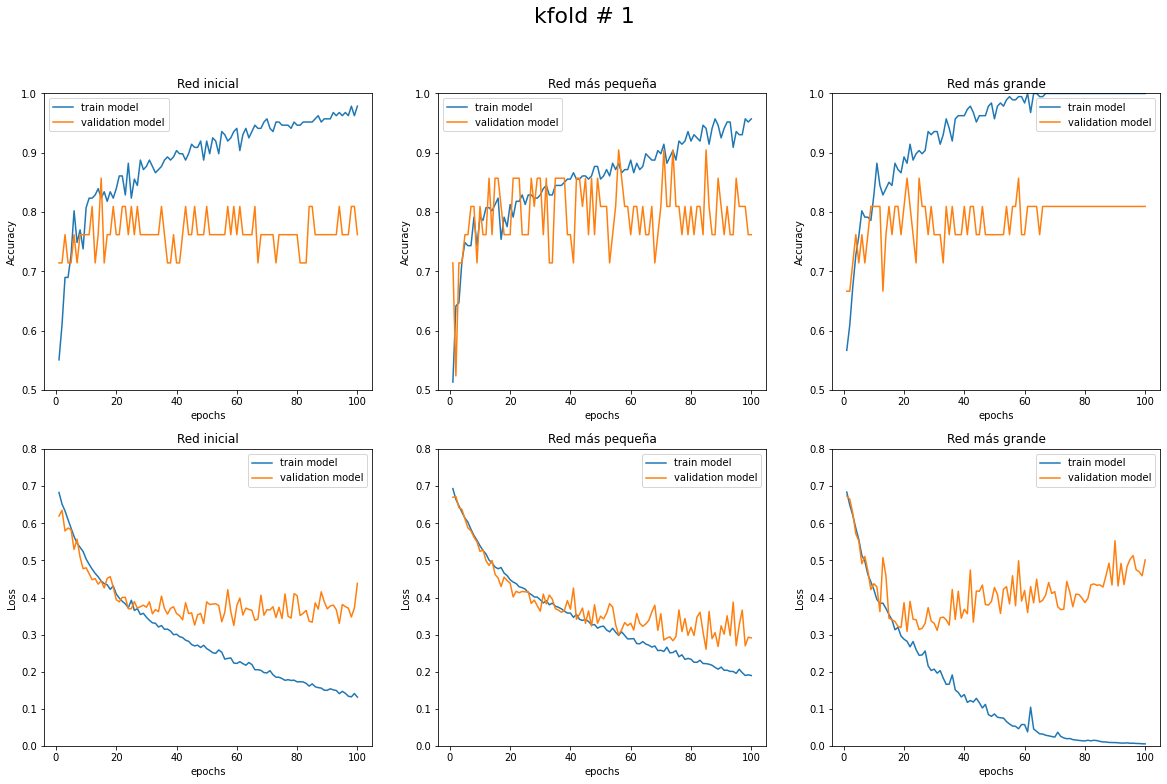

In [89]:
fix, ax = plt.subplots(2,3, figsize=(20,12))

epoch_idx = 1 #0...-1

#
ax[0,0].plot(range(1,101), acc[epoch_idx], label='train model')
ax[0,0].plot(range(1,101), val_acc[epoch_idx], label='validation model')
ax[0,0].legend()
ax[0,0].set_title('Red inicial')
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].set_ylim([0.5, 1])
#
ax[0,1].plot(range(1,101), acc2[epoch_idx], label='train model')
ax[0,1].plot(range(1,101), val_acc2[epoch_idx], label='validation model')
ax[0,1].legend()
ax[0,1].set_title('Red más pequeña')
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].set_ylim([0.5, 1])
#
ax[0,2].plot(range(1,101), acc3[epoch_idx], label='train model')
ax[0,2].plot(range(1,101), val_acc3[epoch_idx], label='validation model')
ax[0,2].legend()
ax[0,2].set_title('Red más grande')
ax[0,2].set_xlabel('epochs')
ax[0,2].set_ylabel('Accuracy')
ax[0,2].set_ylim([0.5, 1])
#
ax[1,0].plot(range(1,101), loss[epoch_idx], label='train model')
ax[1,0].plot(range(1,101), val_loss[epoch_idx][0], label='validation model')
ax[1,0].legend()
ax[1,0].set_title('Red inicial')
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('Loss')
ax[1,0].set_ylim([0, 0.8])
#
ax[1,1].plot(range(1,101), loss2[epoch_idx], label='train model')
ax[1,1].plot(range(1,101), val_loss2[epoch_idx][0], label='validation model')
ax[1,1].legend()
ax[1,1].set_title('Red más pequeña')
ax[1,1].set_xlabel('epochs')
ax[1,1].set_ylabel('Loss')
ax[1,1].set_ylim([0, 0.8])
#
ax[1,2].plot(range(1,101), loss3[epoch_idx], label='train model')
ax[1,2].plot(range(1,101), val_loss3[epoch_idx][0], label='validation model')
ax[1,2].legend()
ax[1,2].set_title('Red más grande')
ax[1,2].set_xlabel('epochs')
ax[1,2].set_ylabel('Loss')
ax[1,2].set_ylim([0, 0.8])

plt.suptitle(f'kfold # {epoch_idx}', fontsize= 22)

<font color='green'>**Fin Actividad 2**</font> (50 Minutos)